In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd/users/prave/datasets/csv files/NLP dataset/movie genre classification

C:\users\prave\datasets\csv files\NLP dataset\movie genre classification


In [3]:
train=pd.read_csv("kaggle_movie_train.txt")
train.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
train.shape

(22579, 3)

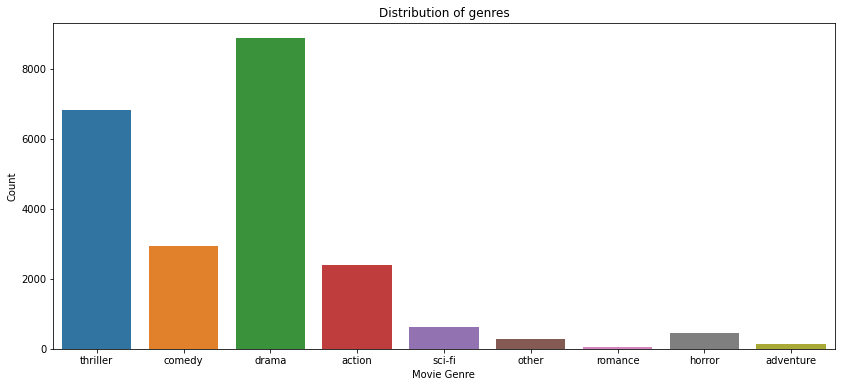

In [5]:
# visualizing the count of "genre" column from the dataset
plt.figure(figsize=(14,6))
sns.countplot(train['genre'])
plt.title("Distribution of genres")
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.show()

# Data Cleaning & Preprocessing

In [6]:
g=train['genre'].sort_values()
g.unique()

array(['action', 'adventure', 'comedy', 'drama', 'horror', 'other',
       'romance', 'sci-fi', 'thriller'], dtype=object)

In [7]:
# Mapping the genre to values
train['genre']=train['genre'].map({'other':0,'action':1,'adventure':2,'comedy':3,'drama':4,'horror':5,'romance':6,'sci-fi':7,
                                  'thriller':8})

In [8]:
train.isna().sum()

id       0
text     0
genre    0
dtype: int64

In [9]:
# importing essential libraries for performing Natural Language Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [10]:
# Cleaning the text
corpus=[]
ps=PorterStemmer()

for i in range(0,train.shape[0]):
    
    # cleaning special character fro the script
    script=re.sub(pattern='[^a-zA-Z]',repl=' ',string=train['text'][i])
    
    # Converting the entire text into lower case
    script=script.lower()
    
    # tokenizing the script by words
    words=script.split()
    
    # Removing the stop words
    script_words=[word for word in words if word not in set(stopwords.words('english'))]
    
    # stemming the stop words
    words=[ps.stem(word) for word in script_words]
    
    # joining the stemmed words
    script=' '.join(words)
    
    #creating a corpus
    corpus.append(script)
    

In [11]:
corpus[:5]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [14]:
# Creating the Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000)
X=cv.fit_transform(corpus).toarray()
y=train['genre'].values

# Model Building

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("X_train shape: {} ,X_test size: {}".format(X_train.shape,X_test.shape))

X_train shape: (15805, 10000) ,X_test size: (6774, 10000)


### Multinomial Naive Bayes

In [16]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [17]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.89%


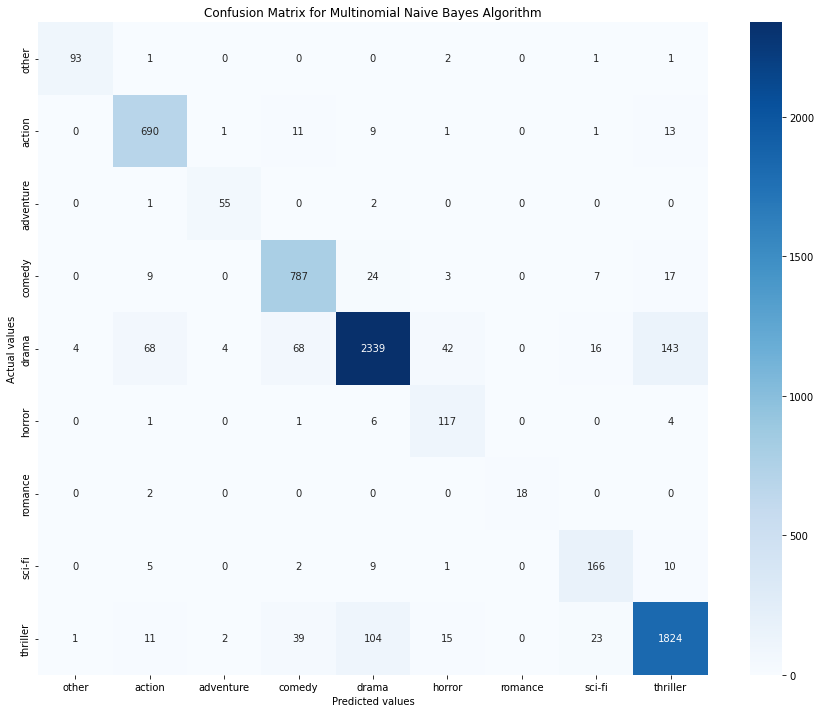

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)


# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues",fmt='g', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [19]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.72%
Accuracy score for alpha=0.2 is: 91.38%
Accuracy score for alpha=0.3 is: 91.07%
Accuracy score for alpha=0.4 is: 90.83%
Accuracy score for alpha=0.5 is: 90.57%
Accuracy score for alpha=0.6 is: 90.43%
Accuracy score for alpha=0.7 is: 90.23%
Accuracy score for alpha=0.8 is: 90.12%
Accuracy score for alpha=0.9 is: 89.96%
Accuracy score for alpha=1.0 is: 89.89%
--------------------------------------------
The best accuracy is 91.72% with alpha value as 0.1


In [20]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# Prediction

In [21]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)

    temp = cv.transform([final_script]).toarray()
    return classifier.predict(temp)[0]

In [22]:
# For generating random integer
from random import randint

In [23]:
test=pd.read_csv('kaggle_movie_test.csv')
test.head()

,id,text
0,1,glances at her. BOOK Maybe I ought to learn t...
1,8,hout breaking stride. Tatiana sees her and can...
2,13,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,24,take myself. BRANDON How bad is the other thi...
4,38,"her body to shield his own. KAY Freeze it, Bug..."


In [57]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(train['genre'].unique()[value]))

Script:  has solidified like curdled milk. The IVs in his arms are plugged into outlets that appear to be grafted to his flesh. He feels the weight of another cable and reaches to the back of his head where he finds an enormous coaxial plugged and locked into the base of his skull. He tries to pull it out but it would be easier to pull off a finger. To either side he sees other tube shaped pods filled with red gelatin beneath the wax like surface, pale and motionless, he sees other human beings. Fanning out in a circle, there are more. All connected to a center core,each capsule like a red, dimly glowing petal attached to a black metal stem. Above him, level after level, the stem rises seemingly forever. He moves to the foot of the capsule and looks out. The image assaults his mind. Towers of glowing petals spiral up to incomprehensible heights, disappearing down into a dim murk like an underwater abyss. His sight is blurred and warped, exaggerating the intensity of the vision. The sou

In [60]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(train['genre'].unique()[value]))

Script: houts You're going to be late! ANNIE to Laurie He shouts, too. Brackett smiles as Loomis walks up behind him. BRACKETT Goodbye, girls. ANNIE AND LAURIE Bye. Annie's car pulls away. LOOMIS Sheriff? I'm Doctor Sam Loomis. BRACKETT Lee Brackett. As they talk CAMERA SLOWLY MOVES AROUND THEM to a view of the street. LOOMIS I'd like to talk to you, if I could. BRACKETT May be a few minutes. I gotta stick around here... LOOMIS It's important. Loomis' station wagon moves by behind them. Loomis doesn't see it. BRACKETT Ten minutes. LOOMIS I'll be here. CUT TO EXT. MOON NIGHT Through the blowing trees we see the full moon rising in the night sky. The are SOUNDS of wind and CHIRPING CRICKETS. EXT. RESIDENTIAL STREET NIGHT Annie's car moves down a quiet little residential street and pull up in front of a two story house set back from the street the Doyle house. ANGLE FROM STATION WAGON We are in the front seat of the station wagon. Through the windshield we see Laurie get out of Annie's ca

In [63]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(train['genre'].unique()[value]))

Script: o a nearby trash can that's overflowing with cigar shavings already . Suga presses against Craig. SUGA Would you like a glass of wine, baby? CRAIG No thank you. It's too early. Uncle Elroy stuffs the open cigar full of weed. He's concentrating. UNCLE ELROY Boy, I can roll a blunt better than them bitches in Havana. I know Willie don't let'cha smoke in the house, but I'm ya uncle. I don't care how high you get in my house. Long as you let me hit it... He licks and rolls. UNCLE ELROY cont'd Look at that. It's perfect. SUGA Fire it up, Roy. Uncle Elroy grabs the lighter. UNCLE ELROY Now I'mma show you the real Puff Daddy. He lights the blunt. Craig's watching, so is Suga. Uncle Elroy holds the smoke in for a very long time. Maybe too long...'cause his eyes start to bulge, and he starts to toke cough with your mouth closed . And toke. And toke. And toke. It looks like he's about to bust when he lets out a big puff of smoke. Then he starts to cough, and cough, and cough out of contr